# HW: Calculating Gradients
* **Created by:** Eric Martinez
* **For:** CSCI 4341 - Special Topics in CS
* **At:** University of Texas Rio-Grande Valley

## Background

In [40]:
import torch
import matplotlib.pyplot as plt

Let's make a fake dataset

In [41]:
import numpy as np
from numpy.random import normal,seed,uniform
np.random.seed(42)
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

def make_fake_data(a=3, b=2, c=1):
    x = torch.linspace(-2, 2, steps=20)[:,None] # evenly distribute x values
    quad = a*x**2 + b*x + c # the real distribution use to generate data
    y = add_noise(quad, 0.3, 1.5) # noisy y values
    return x, y

In [42]:
x, y = make_fake_data()

Let's visualize the data

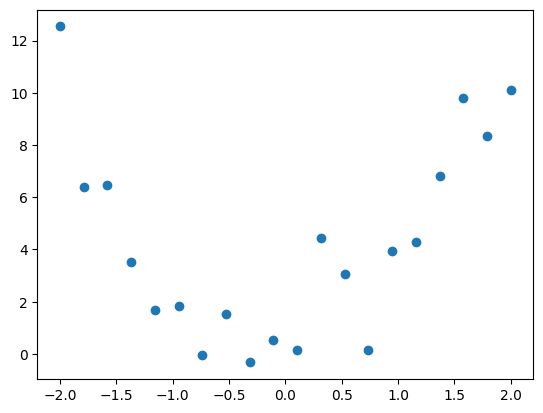

In [43]:
plt.scatter(x,y);

We are trying to learn the parameters $a$, $b$, and $c$ to best fit a quadratic $ax^2 + bx + c$ to the data. 

The loss function that we are optimizing is,

$$\text{MSE}(\hat{y}, y) = \frac{\sum_{i=0}^{N - 1} (\hat{y}_i - y_i)^2}{N}$$

Where $\hat{y}$ is our predictions and $y$ is the actual values.

Let's express this in Python.

In [44]:
# tensor definition
def mse(preds, acts): 
    return ((preds-acts)**2).mean()

In the lecture we derived the gradient with respect to parameter $a$.

$$
\begin{equation}
 \frac{d\textit{MSE}}{da}=\frac{1}{N}\sum_{i=0}^{N - 1}2(a{x_i}^2 + b{x_i} + c - y_i) * {x_i}^2
\end{equation}
$$

We can turn that into Python code as follows:

In [45]:
def gradient_a(x, y, b, c):
    grad_a = (2 * (a * torch.pow(x, 2) + b * x + c - y)) * torch.pow(x, 2)
    grad_a = grad_a.mean() # This is equivalent to 1/N sum from i=0 to N-1
    return grad_a

We can try this out:

In [46]:
# setting starting values
a = 1.1
b = 2.1
c = 1.3

a_grad = gradient_a(x, y, b, c)

print(a_grad)

tensor(-8.8483, dtype=torch.float64)


## Problem 1

For this problem, derive the gradient with respect to parameter $b$.

$$
\begin{equation}
 \frac{d\textit{MSE}}{db}= \textit{??}
\end{equation}
$$

_Fill in the above LaTeX formula with the correct formula for the derivative with respect to $b$._

## Problem 2

Consider the previous problem, derive the gradient with respect to parameter $c$.

$$
\begin{equation}
 \frac{d\textit{MSE}}{dc}= \textit{??}
\end{equation}
$$

_Fill in the above LaTeX formula with the correct formula for the derivative with respect to $b$._

## Problem 3

#### Part A

Write PyTorch code that calculates the gradient with respect to parameter $b$.

In [10]:
def gradient_b(x, y, a, c):
    # todo
    return grad_b

Test it out

In [37]:
# setting starting values
a = 1.1
b = 2.1
c = 1.3

b_grad = gradient_b(x, y, a, c)

print(b_grad)

tensor(4.6156, dtype=torch.float64)


#### Part B

Write PyTorch code that calculates the gradient with respect to parameter $c$.

In [12]:
def gradient_c(x, y, a, b):
    # todo
    return grad_c

Test it out

In [13]:
# setting starting values
a = 1.1
b = 2.1
c = 1.3

c_grad = gradient_c(x, y, a, b)

print(c_grad)

tensor(-2.6798, dtype=torch.float64)


_Attach your work to a document and submit to Blackboard._

## Problem 4

Below is a basic PyTorch "training loop". If you properly define the gradient functions, you should be able to get this to work and properly train the model with gradient descent!

Your loss should converge to somewhere around 2.2-2.4

`lr`, or learning rate, is used to scale the amount that we adjust each parameter in response to the gradient.

Too small a step size, it may take many iterations, `max_steps`, before converging on a good solution.

Find values of `lr` and `max_steps` such that you get a loss below 2.4

In [39]:
lr = 0.1 # learning rate (hyper-parameter)
max_steps = 10 # maximum number of iterations in training loop (hyper-parameter)

# setting starting values for parameters
a = 1.1
b = 2.1
c = 1.3

for i in range(max_steps):
    # forward pass: fit a quadratic with current parameters and get predictions
    predictions = a*x**2 + b*x + c 
    
    # compute mse loss by comparing to actuals
    loss = mse(predictions, y)
    
    # compute the gradient for each parameter
    a_grad = gradient_a(x, y, b, c)
    b_grad = gradient_b(x, y, a, c)
    c_grad = gradient_c(x, y, a, b)

    # update each parameter in the opposite direction of the gradient
    a -= a_grad * lr
    b -= b_grad * lr
    c -= c_grad * lr
    
    print(f'step={i}; loss={loss:.2f}; a={a:.2f}, b={b:.2f}, c={c:.2f}')

    
if loss < 2.4:
    print("\nYay! You did it!")
else:
    print("\nSorry, try again.")

step=0; loss=11.25; a=1.98, b=1.64, c=1.57
step=1; loss=4.71; a=2.10, b=1.31, c=1.52
step=2; loss=3.68; a=2.14, b=1.08, c=1.45
step=3; loss=3.17; a=2.17, b=0.92, c=1.38
step=4; loss=2.89; a=2.20, b=0.81, c=1.32
step=5; loss=2.74; a=2.22, b=0.73, c=1.26
step=6; loss=2.64; a=2.24, b=0.67, c=1.20
step=7; loss=2.58; a=2.27, b=0.63, c=1.15
step=8; loss=2.54; a=2.29, b=0.60, c=1.11
step=9; loss=2.51; a=2.30, b=0.58, c=1.06

Sorry, try again.
